In [192]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import os
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
with open('stop_words_english.txt', 'r') as file:
        stop_words = file.readlines()

In [3]:
res = []
for sub in stop_words:
    res.append(sub.replace("\n", ""))

In [4]:
stop_words = set(res)

### Hepler functions:

In [5]:
# Tokenize the text
def tokenize_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text) # remove non words or numbers
    text = re.sub(r"\b\w{1}\b", " ", text) # remove all words or numbers of 1 letter
    tokens = word_tokenize(text)
    return tokens

In [6]:
def perform_linguistic_operations(tokens):
    
     # Perform case folding
    case_folded_tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in case_folded_tokens if token not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

In [7]:
def case_folding(tokens):
    # Perform case folding
    case_folded_tokens = [token.lower() for token in tokens]
    return case_folded_tokens

def remove_sw(tokens):
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

def stemming(tokens):
    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [8]:
# Create a language model
def create_language_model(tokens):
    n = len(tokens)
    language_model = {}
    for token in tokens:
        if token in language_model:
            language_model[token] += 1
        else:
            language_model[token] = 1
    
    # devide by n
    language_model_ = {k:v/int(n) for k, v in language_model.items()}
    
    return language_model_

In [10]:
def visualize_language_model(language_model):
    sorted_model = sorted(language_model.items(), key=lambda x: x[1], reverse=True)
    top_tokens = [x[0] for x in sorted_model[:20]]
    top_probs = [x[1] for x in sorted_model[:20]]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.bar(top_tokens, top_probs)
    
    # Adding values to the bars
    for i, v in enumerate(top_probs):
        ax.text(i, v, str(round(v, 4)), ha='center')
        
    ax.set_xlabel('Term')
    ax.set_ylabel('Probability')
    ax.set_title('Top 20 Terms in Language Model')
    ax.set_xticklabels(top_tokens, rotation=90)
    plt.show()


## Task 1

### Create languge model after each step:

In [214]:
directory = 'text'
social_bias_result = {}
text = ""

# open and read all the "social media bias" files
for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as f:
                text_doc = f.read()
                text = text + " " + text_doc

# Tokenize the text
tokens = tokenize_text(text)

# Create a language model on original tokens
original_language_model = create_language_model(tokens)

# lower case tokens
lower_case_tokens = case_folding(tokens)

# create language model on lower cased tokens
lower_case_lm = create_language_model(lower_case_tokens)

# remove stop word tokens
no_sw_tokens = remove_sw(lower_case_tokens)

# Create language model after removing stop words
no_sw_lm = create_language_model(no_sw_tokens)

# Perform all 3 linguistic operations on originial tokens
filtered_tokens = perform_linguistic_operations(tokens)

# Create the final language model after all preproccesing steps
filtered_language_model = create_language_model(filtered_tokens)

#### 1) Original language model:

/var/folders/lh/8gp075pj78d6sr5jpk3_1xj80000gn/T/ipykernel_83970/1887032983.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_tokens, rotation=90)


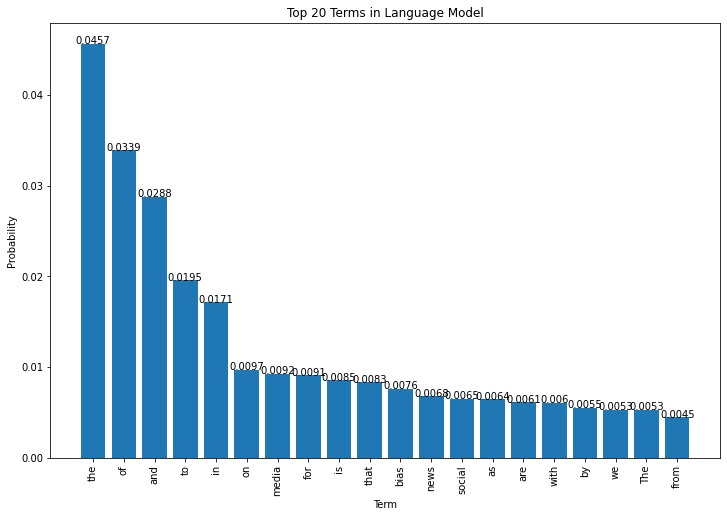

In [357]:
visualize_language_model(original_language_model)

#### 2) After case folding language model:

/var/folders/lh/8gp075pj78d6sr5jpk3_1xj80000gn/T/ipykernel_83970/1887032983.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_tokens, rotation=90)


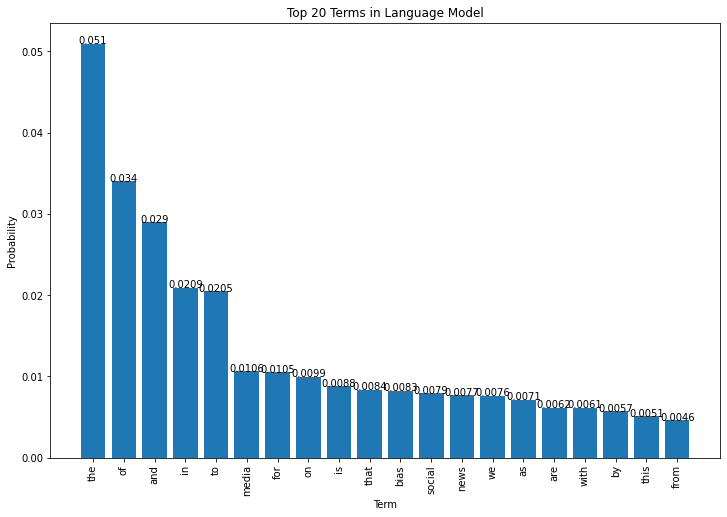

In [361]:
visualize_language_model(lower_case_lm)

In [302]:
sorted_model = dict(sorted(lower_case_lm.items(), key=lambda x: x[1], reverse=True))

#### 3) After stop words removal language model:

/var/folders/lh/8gp075pj78d6sr5jpk3_1xj80000gn/T/ipykernel_83970/1887032983.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_tokens, rotation=90)


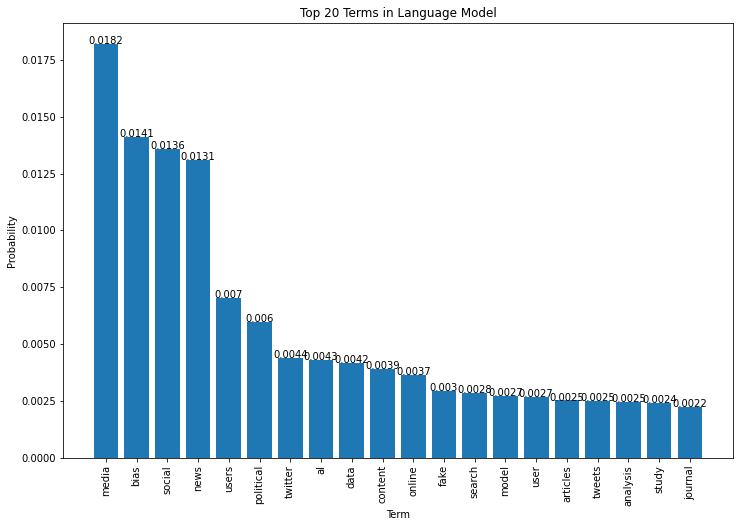

In [362]:
visualize_language_model(no_sw_lm)

In [363]:
sorted_model = dict(sorted(no_sw_lm.items(), key=lambda x: x[1], reverse=True))

#### 4) After stemming language model:

/var/folders/lh/8gp075pj78d6sr5jpk3_1xj80000gn/T/ipykernel_83970/1887032983.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_tokens, rotation=90)


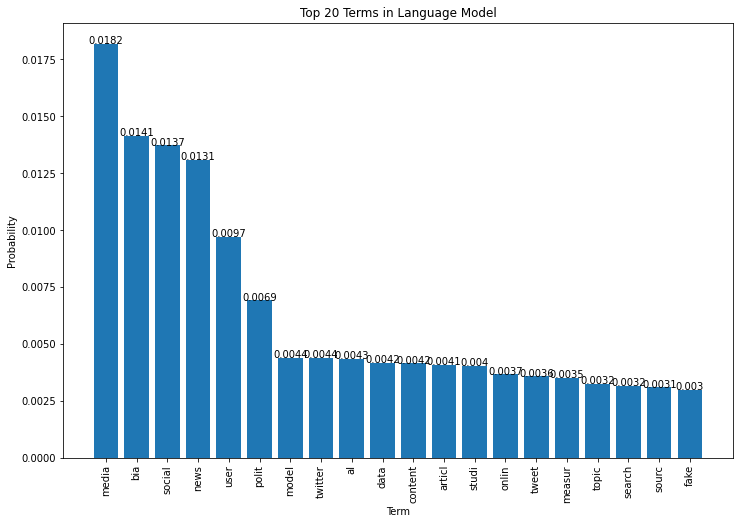

In [367]:
visualize_language_model(filtered_language_model)

## Task 2

#### Create collection with all the "social media bias" documents, and performs processing operations:

In [263]:
directory = 'text'
social_media_result = {}

for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as f:
                text = f.read()

            # Tokenize the text
            tokens = tokenize_text(text)

            # Perform linguistic operations
            filtered_tokens = perform_linguistic_operations(tokens)
            
            file_name = filename.split(".")[0]
            social_bias_result[file_name] = filtered_tokens

#### Create collection with all the "facebook bias" documents, and performs processing operations:

In [264]:
directory = 'facebook bias'
facebook_bias_result = {}

for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as f:
                text = f.read()

            # Tokenize the text
            tokens = tokenize_text(text)

            # Perform linguistic operations
            filtered_tokens = perform_linguistic_operations(tokens)
            
            file_name = filename.split(".")[0]
            facebook_bias_result[file_name] = filtered_tokens

#### Explore language model of facebook bias documents:

In [217]:
directory = 'facebook bias'
text = ""

# open and read all the "social media bias" files
for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as f:
                text_doc = f.read()
                text = text + " " + text_doc

# Tokenize the text
tokens = tokenize_text(text)

# Perform all 3 linguistic operations on originial tokens
filtered_tokens = perform_linguistic_operations(tokens)

# Create the final language model after all preproccesing steps
facebook_language_model = create_language_model(filtered_tokens)

/var/folders/lh/8gp075pj78d6sr5jpk3_1xj80000gn/T/ipykernel_83970/1887032983.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_tokens, rotation=90)


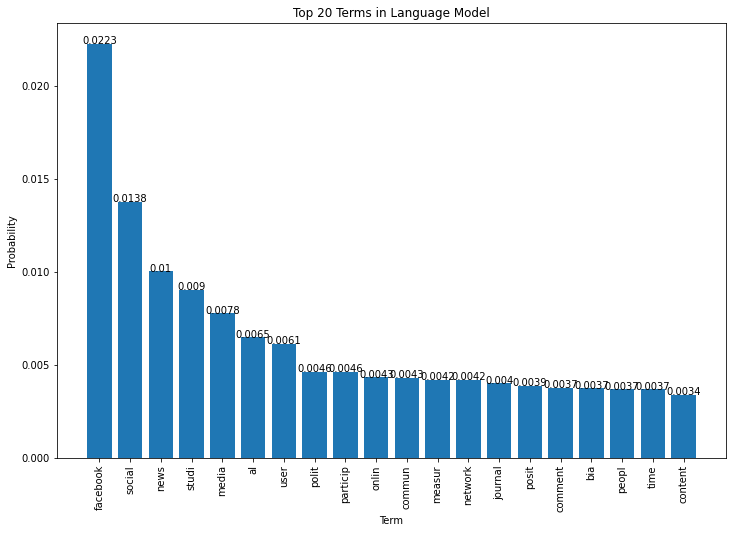

In [512]:
visualize_language_model(facebook_language_model)

#### Combine the two collections into a single collection and tag with a label each document:

In [265]:
# Convert the dictionaries into pandas dataframes
df_A = pd.DataFrame(list(social_bias_result.items()), columns=['Document Name', 'Tokenized Words'])
df_B = pd.DataFrame(list(facebook_bias_result.items()), columns=['Document Name', 'Tokenized Words'])

# Add a label column to the dataframes
df_A['Label'] = 1 #social bias
df_B['Label'] = 0 #facebook bias

# Combine the two dataframes into one
df = pd.concat([df_A, df_B], axis=0)
df = df.reset_index(drop=True)

In [267]:
df

,Document Name,Tokenized Words,Label
0,Promoting users’ intention to share online hea...,"[process, manag, 57, 2020, 102354, content, li...",1
1,Media Bias Monitor Quantifying Biases of,"[proceed, twelfth, intern, aaai, confer, web, ...",1
2,Fake News in Social Media Bad Algorithms or Bi...,"[jistap, httpwwwjistaporg, paper, journal, sci...",1
3,Investigation of social media representation b...,"[intern, journal, disast, risk, reduct, 81, 20...",1
4,The risk of racial bias while tracking influen...,"[journal, american, medic, informat, associ, 2...",1
...,...,...,...
95,Facebook and Romantic Relationships Intimacy a...,"[cyberpsycholog, behavior, social, network, vo...",0
96,India Elections 2014 Time Lagged Correlation b...,"[acceler, world, india, elect, 2014, timelag, ...",0
97,Facebook Recruitment of Vaccine-Hesitant Canad...,"[jmir, public, health, surveil, tustin, al, or...",0
98,Facebook in the News copy,"[digit, journal, issn, 21670811, print, 216708...",0


#### Create tf-idf vectors for all the documents in the collection:

In [182]:
df['Tokenized Words'] = df['Tokenized Words'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to extract features from the tokenized words
vectorizer = TfidfVectorizer()
features_vectorizer = vectorizer.fit_transform(df['Tokenized Words'].tolist())

# Convert the features into a numpy array
features = features_vectorizer.toarray()

# Create a numpy array for the labels
labels = df['Label'].to_numpy()

In [412]:
pd.DataFrame(features, columns=vectorizer.get_feature_names_out()).sample(10, axis=1).sample(10)

,australia,kira,lick,disquot,bamman,mehrab,premium,newer,331,2sampl
6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
73,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
86,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
79,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
52,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42,0.007991,0.0,0.0,0.0,0.064959,0.0,0.0,0.0,0.0,0.0
26,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
29,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
55,0.015279,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
88,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### Split the data to train and test:

In [136]:
# Split the data into training and testing sets and return the indices
train_idx, test_idx = train_test_split(range(len(labels)), test_size=0.1, random_state=0)

# Get the features and labels for training and testing
X_train = [features[i] for i in train_idx]
y_train = [labels[i] for i in train_idx]
X_test = [features[i] for i in test_idx]
y_test = [labels[i] for i in test_idx]

#### Explore the test set:

In [137]:
test_df = df.iloc[test_idx]

In [560]:
test_df

,Document Name,Tokenized Words,Label
26,Neutral bots probe political bias on social media,open neutral bot probe polit bia social media ...,1
86,Facebook News Sharing Hostile Perceptions of N...,articl facebook news share hostil percept news...,0
2,Media Bias Monitor Quantifying Biases of,proceed twelfth intern aaai confer web social ...,1
55,Facebook Study A Little Bit Unethical But Wort...,bioethic inquiri 2015 12179 182 doi 101007s116...,0
75,A Qualitative Study of How Facebook Storefront...,walden univers colleg manag technolog certifi ...,0
92,WORD USAGE BIAS IN FACEBOOK COMMUNITIES,word usag bia facebook commun psycholinguist a...,0
16,Hostile Media Perceptions in the Age of Social...,journal broadcast electron media issn print on...,1
73,Facebook Recruitment for Children with Advance...,progress palli care scienc art care issn print...,0
54,The Personality of Popular Facebook Users,session social network analysi februari 1115 2...,0
94,Improving social media measurement in surveys,comput human behavior 57 2016 82e92 content li...,0


#### Define and train the classifiers, and predict:

In [146]:
# Define the classifiers
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier()
]

In [147]:
accuracies = {}
results = {}

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=0)
    
for classifier in classifiers:

    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    
    results[classifier.__class__.__name__] = (y_test, y_predict)
    accuracies[classifier.__class__.__name__] = accuracy_score(y_test, y_predict)

In [439]:
accuracies

{'GaussianNB': 0.8,
 'KNeighborsClassifier': 0.9,
 'LogisticRegression': 0.8,
 'DecisionTreeClassifier': 0.8}

#### Explore models performance:

* Sensitivity, Specifity and Accuracy

In [201]:
from sklearn.metrics import recall_score, precision_score

metrics = pd.DataFrame(columns=['Accuracy', 'Sensitivity', 'Specificity'])

for model_name, accuracy in accuracies.items():
    y_true, y_pred = results[model_name]
    sensitivity = recall_score(y_true, y_pred, pos_label=0)
    specificity = recall_score(y_true, y_pred, pos_label=1)
    metrics.loc[model_name] = [accuracy, sensitivity, specificity]


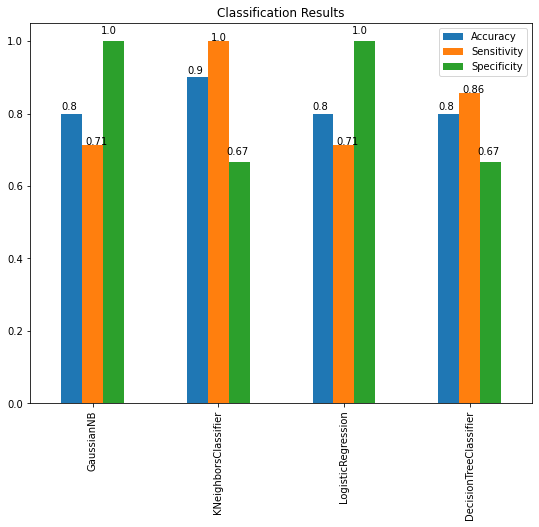

In [202]:
ax = metrics.plot.bar(figsize=(9,7))
plt.title('Classification Results')

# Add labels to the bars
for i, v in enumerate(metrics['Accuracy']):
    ax.text(i - 0.25, v + 0.01, str(round(v, 2)), fontsize=10, color='black')

for i, v in enumerate(metrics['Sensitivity']):
    ax.text(i - 0.06, v + 0.001, str(round(v, 2)), fontsize=10, color='black')

for i, v in enumerate(metrics['Specificity']):
    ax.text(i + 0.06, v + 0.02, str(round(v, 2)), fontsize=10, color='black')


* Confusion matrix

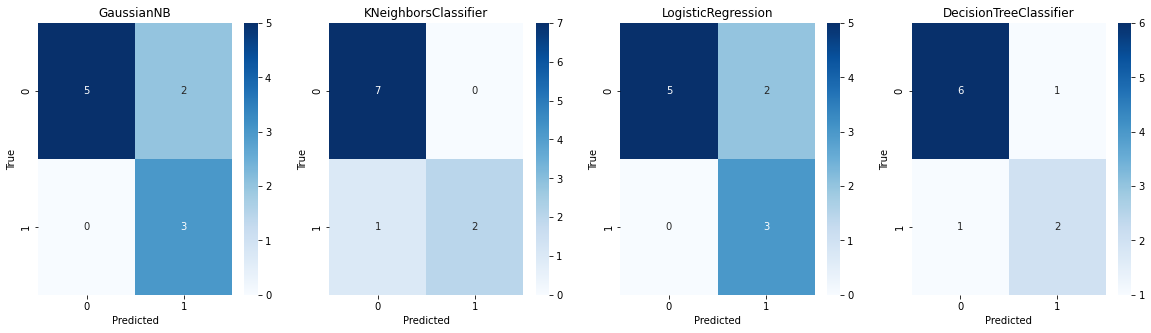

In [438]:
fig, axs = plt.subplots(1, len(results), figsize=(20,5))

for ax, (classifier_name, (y_test, y_predict)) in zip(axs, results.items()):
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(classifier_name)

plt.show()

* Classification reports:

In [475]:
for classifier_name, (y_test, y_predict) in results.items():
    
    print(classifier_name)
    print()
    # Generate the classification report
    report = classification_report(y_test, y_predict)

    print(report)

GaussianNB

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10

LogisticRegression

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0

### Explore KNN:

In [441]:
results["KNeighborsClassifier"]

([1, 0, 1, 0, 0, 0, 1, 0, 0, 0], array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]))

In [477]:
#False Negative Doc
test_df.loc[2]

Document Name               Media Bias Monitor Quantifying Biases of
Tokenized Words    proceed twelfth intern aaai confer web social ...
Label                                                              1
Name: 2, dtype: object

In [478]:
# split the long string in the column into a list of words
words = test_df.iloc[2]["Tokenized Words"].split()

In [486]:
from nltk.probability import FreqDist
freqdist=FreqDist(words)
freqdist.most_common(11)

[('news', 183),
 ('outlet', 127),
 ('media', 123),
 ('bia', 90),
 ('facebook', 81),
 ('audienc', 57),
 ('bias', 50),
 ('user', 41),
 ('demograph', 39),
 ('social', 35),
 ('approach', 35)]

In [189]:
# Get the row index for which you want to find the top features
row_index = 2

# Get the indices of the features in descending order of their values for the row
top_feature_indices = np.argsort(features[row_index])[::-1][:10]

# Get the feature names and their corresponding values for the row
feature_names = vectorizer.get_feature_names_out()
top_features = [(feature_names[i], features[row_index][i]) for i in top_feature_indices]

print(top_features)

[('outlet', 0.5047341888496495), ('news', 0.4423066999194943), ('media', 0.233105024440349), ('audienc', 0.18810795279312983), ('facebook', 0.1767029805559325), ('bia', 0.17227940574416253), ('lean', 0.15329555614161153), ('demograph', 0.11844318589601194), ('liber', 0.11822544578751747), ('conserv', 0.10967942958944464)]


In [190]:
# Separate the features array into two parts
first_half_features = features[:50]
last_half_features = features[51:]

# Calculate the mean of each feature for each part
centroid1 = np.mean(first_half_features, axis=0)
centroid2 = np.mean(last_half_features, axis=0)

In [199]:
cosine_similarity_score = cosine_similarity(features[row_index].reshape(1, -1), centroid2.reshape(1, -1))

In [200]:
cosine_similarity_score

array([[0.55833321]])

### Explore GaussianNB:

In [492]:
results["GaussianNB"]

([1, 0, 1, 0, 0, 0, 1, 0, 0, 0], array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1]))

In [495]:
test_df.iloc[7]["Document Name"]

'Facebook Recruitment for Children with AdvancedFacebook Recruitment for Children with Advanced'

In [497]:
words = test_df.iloc[7]["Tokenized Words"].split()

In [498]:
freqdist=FreqDist(words)
freqdist.most_common(10)

[('recruit', 125),
 ('facebook', 85),
 ('studi', 80),
 ('advertis', 56),
 ('palli', 42),
 ('children', 42),
 ('cancer', 42),
 ('pediatr', 42),
 ('care', 41),
 ('parent', 36)]

In [496]:
test_df.iloc[9]["Document Name"]

'Improving social media measurement in surveys'

In [499]:
words = test_df.iloc[9]["Tokenized Words"].split()

In [550]:
freqdist=FreqDist(words)
freqdist.most_common(10)

[('recruit', 125),
 ('facebook', 85),
 ('studi', 80),
 ('advertis', 56),
 ('palli', 42),
 ('children', 42),
 ('cancer', 42),
 ('pediatr', 42),
 ('care', 41),
 ('parent', 36)]

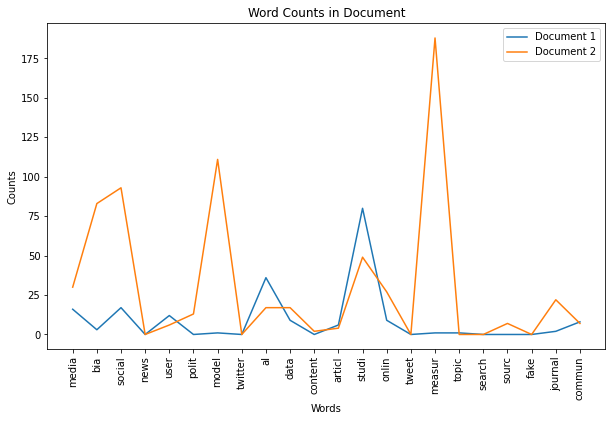

In [546]:
word_list = ['media',
 'bia',
 'social',
 'news',
 'user',
 'polit',
 'model',
 'twitter',
 'al',
 'data',
 'content',
 'articl',
 'studi',
 'onlin',
 'tweet',
 'measur',
 'topic',
 'search',
 'sourc',
 'fake',
 'journal',
 'commun']

# Split the document into words
words = test_df.iloc[7]["Tokenized Words"].split()
words2 = test_df.iloc[9]["Tokenized Words"].split()
words3 = test_df.iloc[0]["Tokenized Words"].split()

# Count the occurrences of each word in the document
word_counts = [words.count(word) for word in word_list]

word_counts2 = [words2.count(word) for word in word_list]

word_counts3 = [words3.count(word) for word in word_list]

# Create a line plot of the word counts
plt.figure(figsize=(10, 6))
#plt.plot(word_list, word_counts)
# Plot the word counts for document 1
plt.plot(word_list, word_counts, label='Document 1')

# Plot the word counts for document 2
plt.plot(word_list, word_counts2, label='Document 2')

#plt.plot(word_list, word_counts3, label='Document 3')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Word Counts in Document')
plt.show()


In [552]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_tfidf_matrix = cosine_similarity(X_train, X_test)

In [553]:
# get cosine similarity matrix
df_cosine_tfidf = pd.DataFrame(cosine_tfidf_matrix)
df_cosine_tfidf

,0,1,2,3,4,5,6,7,8,9
0,0.058852,0.113528,0.091187,0.093171,0.084091,0.129943,0.049421,0.092356,0.110492,0.075288
1,0.168282,1.000000,0.346833,0.129716,0.108880,0.428743,0.402723,0.095553,0.147732,0.118556
2,0.055262,0.120125,0.100503,0.117453,0.143149,0.135534,0.075176,0.107366,0.193408,0.144219
3,0.023657,0.018413,0.023665,0.014284,0.007146,0.024378,0.013141,0.011909,0.029112,0.019785
4,0.154820,0.381833,0.383669,0.071792,0.050236,0.435400,0.412441,0.060321,0.131078,0.146499
...,...,...,...,...,...,...,...,...,...,...
84,0.051866,0.084249,0.044809,0.054667,0.049010,0.109886,0.077083,0.042897,0.159970,0.119764
85,0.090562,0.205425,0.147467,0.169791,0.182713,0.213468,0.112238,0.121890,0.280942,0.179773
86,0.073473,0.197319,0.185969,0.198242,0.222135,0.227340,0.098275,0.153348,0.280298,0.208003
87,0.136352,0.295790,0.274335,0.071569,0.046389,0.342881,0.155750,0.060489,0.119553,0.096428


In [554]:
predictions_tfidf = df_cosine_tfidf.idxmax(axis = 0)

In [565]:
df_predictions_tfidf = pd.DataFrame(columns=['test doc name', 'nearest neighbor docid', 'nearest neighbor label'])

for i in range(len(predictions_tfidf.values)):
    prediction = pd.DataFrame({'test doc name': [test_df.iloc[i]["Document Name"]], 'nearest neighbor docid': [predictions_tfidf.values[i]],'nearest neighbor label': [y_train[i]]})
    df_predictions_tfidf = df_predictions_tfidf.append(prediction,ignore_index=True)
df_predictions_tfidf   

/var/folders/lh/8gp075pj78d6sr5jpk3_1xj80000gn/T/ipykernel_83970/741852068.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predictions_tfidf = df_predictions_tfidf.append(prediction,ignore_index=True)


,test doc name,nearest neighbor docid,nearest neighbor label
0,Neutral bots probe political bias on social media,46,0
1,Facebook News Sharing Hostile Perceptions of N...,1,0
2,Media Bias Monitor Quantifying Biases of,14,0
3,Facebook Study A Little Bit Unethical But Wort...,86,1
4,A Qualitative Study of How Facebook Storefront...,29,1
5,WORD USAGE BIAS IN FACEBOOK COMMUNITIES,31,1
6,Hostile Media Perceptions in the Age of Social...,4,1
7,Facebook Recruitment for Children with Advance...,18,1
8,The Personality of Popular Facebook Users,69,1
9,Improving social media measurement in surveys,15,1


In [209]:
cosine_similarity_score = cosine_similarity(features[94].reshape(1, -1), centroid2.reshape(1, -1))
cosine_similarity_score

array([[0.38704877]])

### Explore regression:

In [566]:
results["LogisticRegression"]

([1, 0, 1, 0, 0, 0, 1, 0, 0, 0], array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1]))

In [614]:
#False Negative Doc
test_df.iloc[5]["Document Name"]

'WORD USAGE BIAS IN FACEBOOK COMMUNITIES'

In [571]:
#False Negative Doc
test_df.iloc[9]["Document Name"]

'Improving social media measurement in surveys'

In [615]:
import numpy as np

# Get the row index for which you want to find the top features
row_index = 92

# Get the indices of the features in descending order of their values for the row
top_feature_indices = np.argsort(features[row_index])[::-1][:10]

# Get the feature names and their corresponding values for the row
feature_names = vectorizer.get_feature_names_out()
top_features = [(feature_names[i], features[row_index][i]) for i in top_feature_indices]

print(top_features)

[('news', 0.4354683145952237), ('social', 0.2278748018900894), ('media', 0.2070511549939003), ('stori', 0.17482721518570263), ('commun', 0.16421420106473006), ('comment', 0.15792532156439165), ('audienc', 0.15180980473467154), ('2018', 0.14552639158037428), ('theori', 0.12334279816467221), ('bias', 0.12125876277957157)]


In [592]:
# Separate the features array into two parts
first_half_features = features[:50]
last_half_features = features[51:]

# Calculate the mean of each feature for each part
centroid1 = np.mean(first_half_features, axis=0)
centroid2 = np.mean(last_half_features, axis=0)

In [618]:
cosine_similarity_score = cosine_similarity(features[92].reshape(1, -1), centroid2.reshape(1, -1))

In [619]:
cosine_similarity_score

array([[0.5787425]])

### Explore decision tree:

In [621]:
results["DecisionTreeClassifier"]

([1, 0, 1, 0, 0, 0, 1, 0, 0, 0], array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1]))

In [623]:
#False Negative Doc
test_df.iloc[2]["Document Name"]

'Media Bias Monitor Quantifying Biases of'

## Task 3

#### Get documents of query "filter bubble"

In [31]:
directory = 'filter bubble'
filter_bubble_result = {}

for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as f:
                text = f.read()

            # Tokenize the text
            tokens = tokenize_text(text)

            # Perform linguistic operations
            filtered_tokens = perform_linguistic_operations(tokens)
            
            file_name = filename.split(".")[0]
            filter_bubble_result[file_name] = filtered_tokens

#### Get documents of query "news fairness"

In [32]:
directory = 'news fairness'
news_fairness_result = {}

for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r') as f:
                text = f.read()

            # Tokenize the text
            tokens = tokenize_text(text)

            # Perform linguistic operations
            filtered_tokens = perform_linguistic_operations(tokens)
            
            file_name = filename.split(".")[0]
            news_fairness_result[file_name] = filtered_tokens

#### Create one collection of all the 4 queries documents

In [33]:
# Convert the dictionaries into pandas dataframes
df_A = pd.DataFrame(list(social_bias_result.items()), columns=['Document Name', 'Tokenized Words'])
df_B = pd.DataFrame(list(facebook_bias_result.items()), columns=['Document Name', 'Tokenized Words'])
df_C = pd.DataFrame(list(filter_bubble_result.items()), columns=['Document Name', 'Tokenized Words'])
df_D = pd.DataFrame(list(news_fairness_result.items()), columns=['Document Name', 'Tokenized Words'])

# Add a label column to the dataframes
df_A['Label'] = 1
df_B['Label'] = 0
df_C['Label'] = 2
df_D['Label'] = 3

# Combine the two dataframes into one
df = pd.concat([df_A, df_B, df_C, df_D], axis=0)
df = df.reset_index(drop=True)

df['Tokenized Words'] = df['Tokenized Words'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to extract features from the tokenized words
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['Tokenized Words'].tolist())

In [34]:
df

,Document Name,Tokenized Words,Label
0,Promoting users’ intention to share online hea...,process manag 57 2020 102354 content list scie...,1
1,Media Bias Monitor Quantifying Biases of,proceed twelfth intern aaai confer web social ...,1
2,Fake News in Social Media Bad Algorithms or Bi...,jistap httpwwwjistaporg paper journal scienc t...,1
3,Investigation of social media representation b...,intern journal disast risk reduct 81 2022 1033...,1
4,The risk of racial bias while tracking influen...,journal american medic informat associ 284 202...,1
...,...,...,...
194,Equality of Voice Towards Fair Representation in,arxiv181108690v1 cssi 21 nov 2018 equal voic f...,3
195,The-Fairness-Doctrine-A-Flawed-Means-to-Attain...,8ammoricomplet 1232008 247 pm fair doctrin fla...,3
196,Google’s Top Stories and the Fairness Doctrine...,googl stori fair doctrin unbalanc amplif farri...,3
197,Ranking with Fairness Constraints,rank fair constraint elisa celi damian strasza...,3


#### Train K-means model:

In [65]:
# Perform clustering using K-means with 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(features.toarray())

/Users/yamit/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Perform SVD:

In [66]:
from sklearn.decomposition import TruncatedSVD

# Perform TruncatedSVD for visualization purposes
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(features)


#### Plot the clusters:

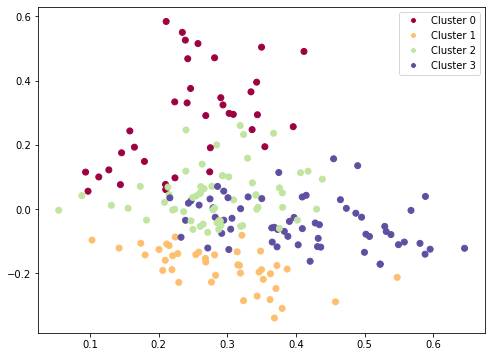

In [69]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(kmeans.labels_)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=colors[kmeans.labels_])

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], label=f'Cluster {i}') for i in range(len(unique_labels))]
plt.legend(handles=handles)


plt.show()

#### Explore clusters:

In [644]:
df['Cluster'] = labels

In [68]:
# Map the label numbers to the dictionary names
label_map = {
    0: 'facebook_bias',
    1: 'social_media_bias',
    2: 'filter_bubble',
    3: 'news_fairness'
}

df['Class'] = df['Label'].map(label_map)
grouped = df.groupby(['Cluster', 'Class']).agg({'Label': 'count'})
grouped

Label
Cluster Class                   
0       filter_bubble          1
        news_fairness         33
        social_media_bias      2
1       facebook_bias         37
        filter_bubble          2
        social_media_bias      3
2       facebook_bias          1
        filter_bubble         37
        news_fairness         10
        social_media_bias     10
3       facebook_bias         11
        filter_bubble         10
        news_fairness          7
        social_media_bias     35

#### Visualize the true labels:

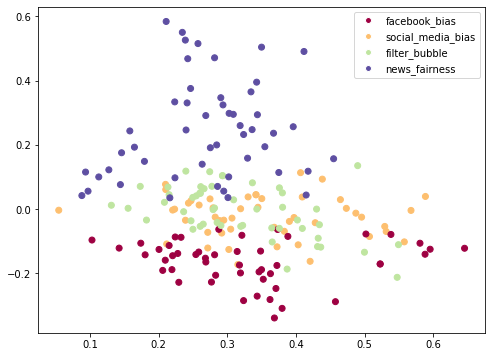

In [646]:
unique_labels = np.unique(df['Label'])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
label_to_class = {label: class_name for label, class_name in zip(df['Label'], df['Class'])}

plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=colors[df['Label'].map(lambda x: np.where(unique_labels == x)[0][0])])

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], label=f'{label_to_class[unique_labels[i]]}') for i in range(len(unique_labels))]
plt.legend(handles=handles)
plt.show()

In [72]:
labels_true = df['Label'].tolist()


#### Calculate Rand Index:

In [73]:
from sklearn.metrics import rand_score

# Calculate the adjusted Rand score
score = rand_score(labels_true, labels)
print(score)

0.7662047611796355


#### Explore SVD components:

In [54]:
component_1 = svd.components_[0]
sorted_idx = np.argsort(component_1)[::-1]  # sort the indices in descending order
print(vectorizer.get_feature_names_out()[sorted_idx][:10])  # print the top 10 most important features

['news' 'media' 'social' 'facebook' 'user' 'bia' 'polit' 'fair' 'bubbl'
 'studi']


In [55]:
important_features = ['news', 'media', 'social', 'facebook', 'user', 'bia', 'polit', 'fair', 'bubbl', 'studi']


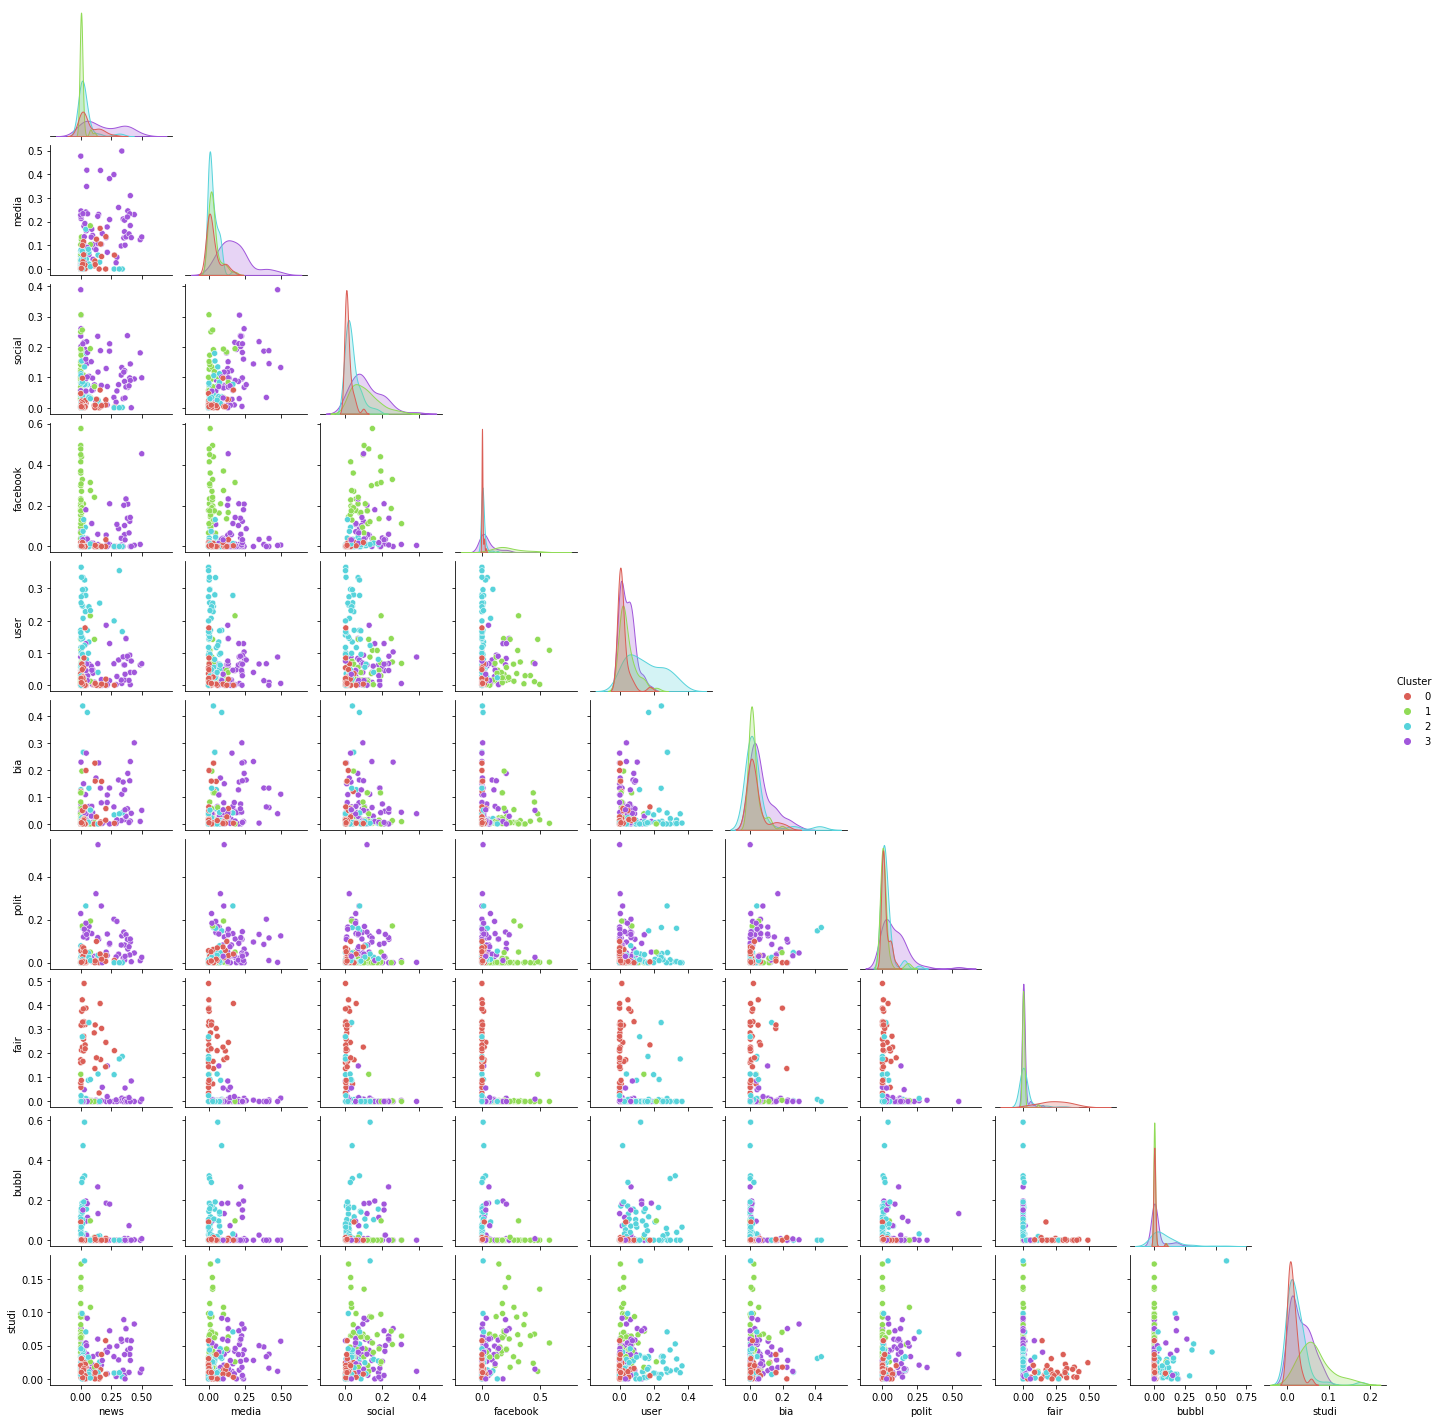

In [70]:
import seaborn as sns

# Get the important features

# Convert the features to a pandas dataframe and select only the important columns
df_features = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())
df_features = df_features.loc[:, important_features]

# Add the cluster labels to the dataframe
df_features['Cluster'] = kmeans.labels_

# Plot the pairplot
color_palette = sns.color_palette("hls", 4)
g = sns.pairplot(data=df_features, hue='Cluster', corner=True, palette=color_palette)
g.fig.set_size_inches(20,20)
plt.show()


<AxesSubplot: xlabel='news', ylabel='fair'>

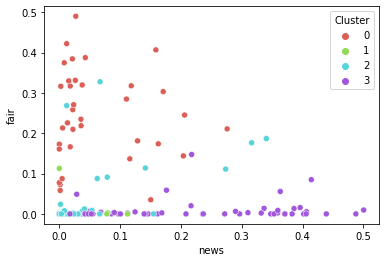

In [91]:
# plot the data
sns.scatterplot(data=df_features, x='news', y='fair', hue='Cluster', palette=color_palette)

In [92]:
df

,Document Name,Tokenized Words,Label,Cluster,Class
0,Promoting users’ intention to share online hea...,process manag 57 2020 102354 content list scie...,1,2,social_media_bias
1,Media Bias Monitor Quantifying Biases of,proceed twelfth intern aaai confer web social ...,1,3,social_media_bias
2,Fake News in Social Media Bad Algorithms or Bi...,jistap httpwwwjistaporg paper journal scienc t...,1,3,social_media_bias
3,Investigation of social media representation b...,intern journal disast risk reduct 81 2022 1033...,1,3,social_media_bias
4,The risk of racial bias while tracking influen...,journal american medic informat associ 284 202...,1,0,social_media_bias
...,...,...,...,...,...
194,Equality of Voice Towards Fair Representation in,arxiv181108690v1 cssi 21 nov 2018 equal voic f...,3,2,news_fairness
195,The-Fairness-Doctrine-A-Flawed-Means-to-Attain...,8ammoricomplet 1232008 247 pm fair doctrin fla...,3,0,news_fairness
196,Google’s Top Stories and the Fairness Doctrine...,googl stori fair doctrin unbalanc amplif farri...,3,3,news_fairness
197,Ranking with Fairness Constraints,rank fair constraint elisa celi damian strasza...,3,0,news_fairness


/Users/yamit/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yamit/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yamit/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yamit/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

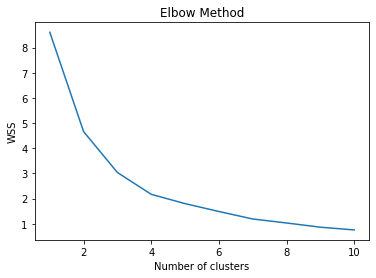

In [99]:
import matplotlib.pyplot as plt

wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_svd[:,:2])
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()
